In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

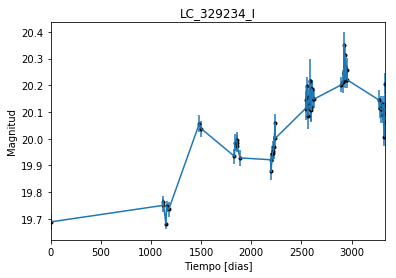

In [2]:
data = np.genfromtxt('LC_329234_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_329234_I')
plt.savefig("LC_329234_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

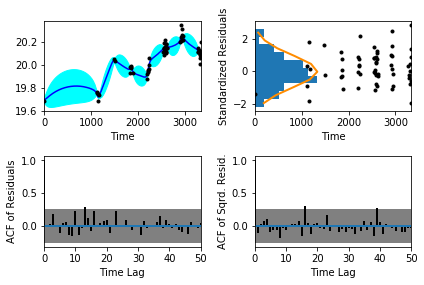

In [5]:
sample.assess_fit()

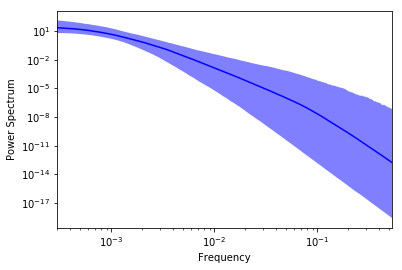

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

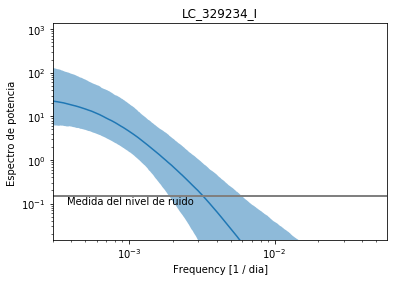

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_329234_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_329234_I')

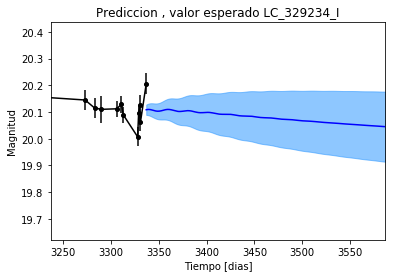

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_329234_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_329234_I')

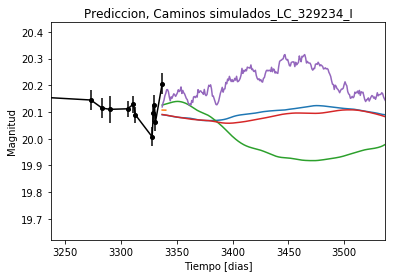

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_329234_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


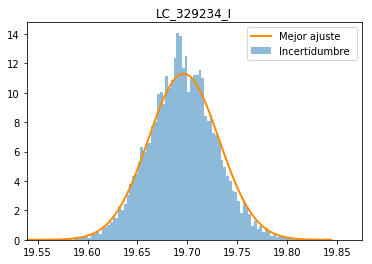

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_329234_I')
plt.savefig("Mejor_ajuste_LC_329234_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_329234_I')

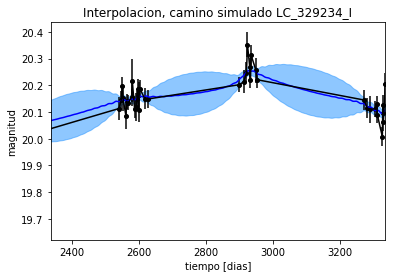

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_329234_I')

Text(0.5,1,'Interpolacion, camino simulado LC_329234_I')

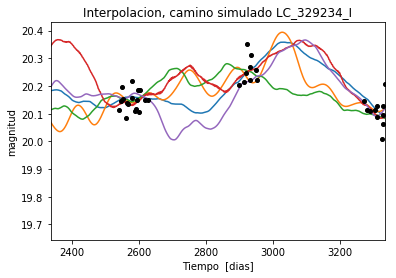

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_329234_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 658.209272674
Median: 0.0118859519956
Standard deviation: 0.210847812733
68% credibility interval: [ 0.00087165  0.21573042]
95% credibility interval: [  3.52208746e-04   8.22007363e-01]
99% credibility interval: [  3.11692086e-04   1.00145311e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 516.152022112
Median: 0.00116548627335
Standard deviation: 0.0528519147977
68% credibility interval: [ 0.00040809  0.01573122]
95% credibility interval: [ 0.00031526  0.14014022]
99% credibility interval: [  3.01806525e-04   3.90518257e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 676.91532784
Median: 0.0119045233433
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1019.89936465
Median: 117.162653009
Standard deviation: 1.5564080843
68% credibility interval: [ 115.34406478  118.2084512 ]
95% credibility interval: [ 112.97624899  118.82945823]
99% credibility interval: [ 110.92841384  119.08867814]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 557.272610988
Median: 0.577821206716
Standard deviation: 2.13761329748
68% credibility interval: [ 0.04894428  3.8033445 ]
95% credibility interval: [ 0.01303577  7.19900764]
99% credibility interval: [  9.50385354e-03   9.98329731e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 394.313645895
Median: 0.23398297777
Standard deviation: 7.69748581582
68% credibility interval: [ 0.00713333  6.1387495 ]
95% credibility interval: [  3.93

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0469382
Median: 5.97127578131e-22
Standard deviation: 2.26295794115e+145
68% credibility interval: [  3.75858462e-56   6.42079685e-08]
95% credibility interval: [  3.56652272e-82   1.51073358e+35]
99% credibility interval: [  9.06353413e-97   2.04329575e+84]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2124.9941352
Median: 19.9563166525
Standard deviation: 0.121142811273
68% credibility interval: [ 19.85063363  20.04780147]
95% credibility interval: [ 19.685138    20.17214362]
99% credibility interval: [ 19.52958985  20.30523973]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 405.934896537
Median: 0.000373963913795
Standard deviation: 0.227573051568
68% credibility interval: [ 0.          0.26854529]
95% credibility interval: [ 0.          0.83776834]
99% credibility interval: [ 0.          0.99880946]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 405.934896537
Median: 0.000373963913795
Standard deviation: 0.227573051568
68% credibility interval: [ 0.          0.26854529]
95% credibility interval: [ 0.          0.83776834]
99% credibility interval: [ 0.          0.99880946]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 534.323316293
Median: 0.0
Standard deviation: 0.000276646857581
68

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1019.89936465
Median: 117.162653009
Standard deviation: 1.5564080843
68% credibility interval: [ 115.34406478  118.2084512 ]
95% credibility interval: [ 112.97624899  118.82945823]
99% credibility interval: [ 110.92841384  119.08867814]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1463.43070558
Median: 0.041325239178
Standard deviation: 0.0597763590935
68% credibility interval: [ 0.02417687  0.08152617]
95% credibility interval: [ 0.01584612  0.19317766]
99% credibility interval: [ 0.01254128  0.38624838]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1864.6254905
Median: 1.1149761799
Standard deviation: 0.171458099761
68% credibility interval: [ 0.96482729  1.30009213]
95% credibility interval: [ 0.83321038  1.50618614]
99% credibility interval: [ 0.76673792  1.6594854 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 762.001085131
Median: 4.5012831822e-05
Standard deviation: 0.0340942460829
68% credibility interval: [  7.21745712e-07   1.84997508e-03]
95% credibility interval: [  1.38778068e-39   2.58793289e-02]
99% credibility interval: [  1.40149983e-89   1.27117233e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 658.209272674
Median: (-0.0746816389408-2.11529283197j)
Standard deviation: 1.949269449
68% credibility interval: [-1.35547421+0.j         -0.00547677-4.77795403j]
95% credibility interval: [ -5.16482459e+00+0.j          -2.21299282e-03-0.00575675j]
99% credibility interval: [ -6.29231546e+00+0.j          -1.95841913e-03-0.00654329j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 516.152022112
Median: (-0.00732296622842+1.9235782415j)
Standard deviation: 1.46793845599
68% credibility interval: [-0.09884216+2.30065638j -0.00256410+0.54396128j]
95% credibility interval: [-0.88052699+1.11399489j -0.00198085+0.01589519j]
99% credibility interval: [ -2.45369857e+00+4.3222741j  -1.89630632e-03+0.j       ]
Posterior summary 